# Predict House Sale Price

Predict the sales price for each house. For each Id in the test set, predict the value of the SalePrice variable 

## 1.Perform exploratory checks

*Load the raw dataset and perform exploratory checks*

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Load datasets
df = pd.read_csv("../data/raw_dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
# Shape of the dataset
print("Dataset Shape:", df.shape)  # (rows, columns)

Dataset Shape: (1459, 80)


In [47]:
# Display first 5 sample rows
print("\nSample Rows:")
print(df.head())  # default first 5 rows


Sample Rows:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0 

In [48]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   45

In [49]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [50]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Show actual duplicate rows if needed
if duplicates > 0:
    print("\nDuplicate Rows:")
    print(df[df.duplicated()])


Number of duplicate rows: 0


## 2. Apply cleaning steps

*Handle missing values, duplicate removal, standardize formats, and detect/treat outliers*

In [51]:
# ---- Handle missing values ----
 
# View missing values count 
print("\nMissing Values (Count):")
print(df.isnull().sum().sort_values(ascending=False).head(15))

# ---- Strategy ----
# - Drop columns with too many missin values (>80% missing)
missing_threshold = 0.8
missing_ratio = df.isnull().sum() / len(df)
cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns with >80% missing: {list(cols_to_drop)}")

# - Fill categorical columns with mode (most frequent value)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Handling:")
print(df.isnull().sum().sum(), "total missing values remaining")


Missing Values (Count):
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
dtype: int64

Dropped columns with >80% missing: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']



Missing Values After Handling:
330 total missing values remaining


In [52]:
# ---- Remove duplicates ----
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows Found: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("duplicates removed.")
else:
    print("No duplicate rows to remove.")


Duplicate Rows Found: 0
No duplicate rows to remove.


In [53]:
# ---- Standardize Formats ----

# - Convert certain columns to categorical
categorical_candidates = ['MSSubClass', 'MSZoning', 'Street', 'SaleCondition']
for col in categorical_candidates:
    if col in df.columns:
        df[col] = df[col].astype('category')

# - Confirm conversion
print("\nData Types After Conversion:")
print(df.dtypes.head(10))


Data Types After Conversion:
Id                int64
MSSubClass     category
MSZoning       category
LotFrontage     float64
LotArea           int64
Street         category
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
dtype: object



LotArea:
Lower Bound = 1201.25, Upper Bound = 17707.25

LotFrontage:
Lower Bound = 25.0, Upper Bound = 113.0

GrLivArea:
Lower Bound = 212.25, Upper Bound = 2626.25


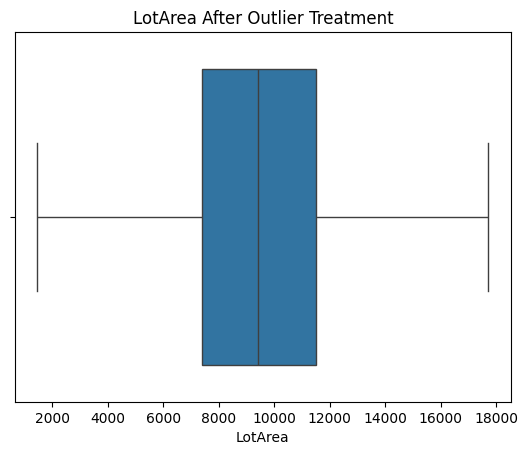

In [54]:
# ---- Detect & Treat Outliers ----

# - Method: IQR (Interquartile Range)
def treat_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # - Print info
    print(f"\n{column}:")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    # - Cap extreme outliers
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound,
                        np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column]))
    
# - Apply to key numerical columns
important_numerical = ['LotArea', 'LotFrontage', 'GrLivArea', 'SalePrice']
for col in important_numerical:
    if col in df.columns:
        treat_outliers_iqr(df, col)

# Visualise after treating outliers
sns.boxplot(x=df['LotArea'])
plt.title("LotArea After Outlier Treatment")
plt.show()


In [55]:
# ---- After cleaning snapshot
print("\nFinal Shape:", df.shape)
print("\nSample Rows (After Cleaning):")
print(df.head())

print("\nSummary Statistics (After Cleaning):")
print(df.describe())


Final Shape: (1459, 76)

Sample Rows (After Cleaning):
     Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  1461         20       RH         80.0  11622.0   Pave      Reg         Lvl   
1  1462         20       RL         81.0  14267.0   Pave      IR1         Lvl   
2  1463         60       RL         74.0  13830.0   Pave      IR1         Lvl   
3  1464         60       RL         78.0   9978.0   Pave      IR1         Lvl   
4  1465        120       RL         43.0   5005.0   Pave      IR1         HLS   

  Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside  ...           0             0         0         120   
1    AllPub    Corner  ...          36             0         0           0   
2    AllPub    Inside  ...          34             0         0           0   
3    AllPub    Inside  ...          36             0         0           0   
4    AllPub    Inside  ...          82             0         0     

In [56]:
# ---- Save cleaned dataset
df.to_csv("../data/cleaned_dataset.csv", index=False)
print("\nCleaned dataset saved to: data/cleaned_dataset.csv")


Cleaned dataset saved to: data/cleaned_dataset.csv
